In [150]:
import pandas as pd
from glob import glob
import json
import seaborn as sns
import tokenizers
from konlpy.tag import Mecab, Okt
sns.set_theme()

from soynlp.word import WordExtractor

# 딴지 자유게시판

In [151]:
m = Mecab()

In [200]:
pkl_concat = [pd.read_pickle(f) for f in glob('data/ddanzi_*.pkl')]
pkl_df = pd.concat(pkl_concat)

pkl_df['url'] = 'https://www.ddanzi.com/free/' + pkl_df.id
# pkl_df = pd.read_pickle('ddanzi_page_1_to_18000.pkl')

In [201]:
def json_read(f):
    with open(f, 'r', encoding='utf-8') as json_file:
        text = json.load(json_file)
    return text

In [228]:
json_concat = [row for f in glob('/media/bcache/jeongwoo/ddanzi/ddanzi_page_*.json') for row in json_read(f) if row is not None]
json_df = pd.DataFrame(json_concat)

In [229]:
df = pd.concat([json_df, pkl_df])

In [230]:
df.index = df.id
df.drop('id', axis=1, inplace=True)

In [231]:
df.time = pd.to_datetime(df.time)

<AxesSubplot:title={'center':'DDANZI Freeboard - # of daily posts'}>

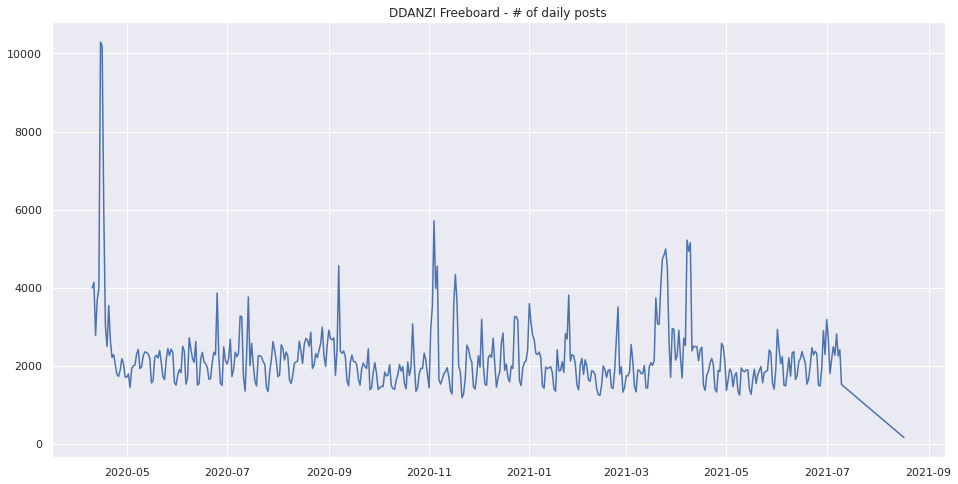

In [232]:
df.time.dt.date.value_counts().sort_index().plot(figsize=(16,8), title='DDANZI Freeboard - # of daily posts')

In [233]:
df['titletext']= df.title + '\n' + df.text

In [234]:
df.drop_duplicates(subset=['url'], keep='first', inplace=True)

In [235]:
df.shape

(937828, 5)

In [188]:
query = "titletext.str.contains('당')"
df.query(query)

,title,text,time,url,titletext
id,,,,,
648360645,여기 정의당 관계자 분 계시면 꼭 읽어봐요,가족끼리는 정치 애기 잘 안하는데....\n \...,2020-10-18 16:24:00,https://www.ddanzi.com/free/648360645,여기 정의당 관계자 분 계시면 꼭 읽어봐요\n가족끼리는 정치 애...
617414160,미통당 애들은 무조건 가출합니다,날도 따뜻하겠다 밖으로 나갑니다.\n \n이러...,2020-04-17 15:44:00,https://www.ddanzi.com/free/617414160,미통당 애들은 무조건 가출합니다\n날도 따뜻하겠다 밖으로 ...
617413866,민주당지지자인척,하면서 개소리하면 작세인줄 모를줄 아나ᄇ...,2020-04-17 15:43:00,https://www.ddanzi.com/free/617413866,민주당지지자인척\n하면서 개소리하면 작세인줄 모르...
617413112,미통당 미한당 합당 할까요 안할까요?,저는 안할거같아요\n의원 꿔줘서 미한당으...,2020-04-17 15:41:00,https://www.ddanzi.com/free/617413112,미통당 미한당 합당 할까요 안할까요?\n저는 안할거같아요\nᄋ...
617412729,미래통합당이 그래도 상식적인 사람들에게 인정 받으려면..,미래통합당이 가진 집토끼의 힘은 강합ᄂ...,2020-04-17 15:41:00,https://www.ddanzi.com/free/617412729,미래통합당이 그래도 상식적인 사람들에게 인정 받으려면..\n미래통합당...
...,...,...,...,...,...
685673725,민주당이 한가하게 노는지 궁금하신 분들은... 각종 진보 스피커들 방송이라도 봐주시...,거기 수많은 민주당 인사나 의원들이 아치...,2021-06-13 17:38:00,https://www.ddanzi.com/free/685673725,민주당이 한가하게 노는지 궁금하신 분들은... 각종 진보 스피커들 방송이라도 봐주시...
685673477,민주당은 최우선 과제로 언론 개혁 실행하라,페미손절 같은 저쪽의 갈라치기 프레임에 ...,2021-06-13 17:36:00,https://www.ddanzi.com/free/685673477,민주당은 최우선 과제로 언론 개혁 실행하라\n페미손절 같은 저ᄍ...
685670115,현직 문학야구장임당,난 씈팬 인데 앞에 이정후 있어서 찍어보...,2021-06-13 17:10:00,https://www.ddanzi.com/free/685670115,현직 문학야구장임당\n난 씈팬 인데 앞에 이정후 있...


https://keep-steady.tistory.com/37

Tokenize 참고!

# 조선일보 포럼

In [189]:
len(glob('/media/bcache/jeongwoo/chosun/chosun/*.json'))

815334

In [190]:
# Not working
# chosun = [json_read(row)  for row in glob('/media/bcache/jeongwoo/chosun/*.json') if row is not None]

In [191]:
chosun = []
err = []
for row in glob('/media/bcache/jeongwoo/chosun/chosun/*.json'):
    try:
        chosun.append(json_read(row))
    except Exception as ex:
        print(f"error at {row}, {ex}")
        err.append(row)

In [192]:
chosun_df = pd.DataFrame(chosun)

In [193]:
chosun_df.loc[chosun_df.time.str.startswith('2')].sort_values(by='time').cat.value_counts()

여당       300612
정부       275941
야당       101365
에세이       82437
사회        22742
문화         9449
지구촌        9329
경제         5496
조토마소식       442
반대          282
찬성          258
서울          239
정치           81
경기           40
국제           23
대구           23
부산           21
대전           21
인천           19
경남           17
강원           17
제주           14
전북           12
충남           12
경북           11
울산           10
광주           10
충북           10
전남            9
              4
야당정부          2
����          1
Name: cat, dtype: int64

In [194]:
chosun_df.sort_values(by='time')

,id,time,cat,title,text
437691,19,2005-02-23 16:54:31,정치,정치권 정체성·과거사 공방,한나라당이 ‘노무현 정부의 정체성이 무엇인지 밝히라’고 촉구하면서 촉발된 여야간 국...
167067,20,2005-02-23 17:44:12,정치,17대 국회에 바란다,17대 국회에 바란다. 우리가 뽑은 국회의원들에게 메세지를 남겨 주세요.
496421,21,2005-02-23 17:50:31,정치,국가보안법 폐지 논란,열린우리당이 법사위 전체회의에서 위원장의 ‘사회권 직무대행’을 통해서라도 국가보안법...
385469,25,2005-02-23 19:45:05,정치,"다음 대통령, 누구를 생각하십니까?",우리나라를 이끌어 나갈 다음 대통령은 누구라고 생각하십니까? 당신이 지지하는 지도자...
497843,26,2005-02-23 20:05:04,정치,盧대통령 집권 2년 평가,노무현(盧武鉉) 대통령이 취임한 지 2년이 되었습니다. 집권 이래 참 많은 일들이 ...
...,...,...,...,...,...
594739,395149,천 2008-09-02 22:50:09,정부,독도문제를 다룬 '그것이 알고싶다'를 보고나서....,진실로 공감하는 내용이었읍니다.\n방송의 한계상 좀더 실체적이고 심도있는 내용이 다...
345943,425181,천 2009-02-22 00:18:55,여당,금강산 관광재개 소식을 접하며.,"참으로 어이없는 기사를 봤다.\n이북발갱이집단의 전쟁위협이 현실화되고있는 이때,\n..."
397095,426468,천 2009-02-28 22:17:20,여당,미디어법안 처리과정을 보면서.,일국의 국가관이 투철하고 봉사관이 강한 시람들의 정치집단이 정당이고 그정당의 생존요...
424245,426475,천 2009-02-28 23:52:00,정부,좌익청산작업의 태만에 실망하며.,이대통령께.\n무척 힘든 시기입니다.\n세계적 경제위기는 우리도 예외는 아니어서 그...


In [195]:
chosun_df['titletext']= chosun_df.title + '\n' + chosun_df.text

In [62]:
sentences = chosun_df.titletext.tolist()

In [63]:
word_extractor = WordExtractor(min_frequency=100,
    min_cohesion_forward=0.05, 
    min_right_branching_entropy=0.0
)
word_extractor.train(sentences) # list of str or like
words = word_extractor.extract()

training was done. used memory 26.267 Gbe memory 29.417 Gb
all cohesion probabilities was computed. # words = 350051
all branching entropies was computed # words = 7225318
all accessor variety was computed # words = 7225318


https://github.com/lovit/soynlp

In [168]:
words['대통령']

Scores(cohesion_forward=0.4629848709088659, cohesion_backward=0.3761611864857365, left_branching_entropy=4.2103066447025945, right_branching_entropy=3.71157945677243, left_accessor_variety=839, right_accessor_variety=855, leftside_frequency=652655, rightside_frequency=27692)

In [169]:
len(words)

143983

In [170]:
import math

def word_score(score):
    return (score.cohesion_forward * math.exp(score.right_branching_entropy))

In [171]:
print('단어   (빈도수, cohesion, branching entropy)\n')
for word, score in sorted(words.items(), key=lambda x:word_score(x[1]), reverse=True)[:30]:
    print('%s     (%d, %.3f, %.3f)' % (
            word, 
            score.leftside_frequency, 
            score.cohesion_forward,
            score.right_branching_entropy
            )
         )

단어   (빈도수, cohesion, branching entropy)

먼저     (63330, 0.901, 5.510)
갑자기     (17552, 0.711, 5.611)
으로     (10822, 0.534, 5.590)
..     (105630, 0.819, 5.135)
...     (72795, 0.751, 5.191)
곧바로     (5732, 0.723, 5.207)
까지     (35619, 0.454, 5.655)
툭하면     (2773, 0.890, 4.936)
함께     (97755, 0.509, 5.491)
됩니다.     (23723, 0.928, 4.861)
스스로     (75521, 0.662, 5.141)
봅니다.     (18072, 0.891, 4.839)
那禰     (2006, 0.983, 4.724)
얼마나     (74934, 0.638, 5.150)
합니다.     (84241, 0.707, 5.033)
완전히     (25955, 0.507, 5.362)
와서     (18122, 0.421, 5.540)
식으로     (18796, 0.437, 5.503)
!!!     (6567, 0.523, 5.300)
,,,     (10696, 0.525, 5.270)
끊임없이     (5783, 0.611, 5.118)
때문에     (146165, 0.529, 5.259)
같은     (233719, 0.477, 5.360)
!!     (13602, 0.567, 5.182)
또한     (96862, 0.540, 5.226)
훗날     (4593, 0.978, 4.632)
씩이나     (491, 0.557, 5.183)
랍니다.     (113, 0.662, 5.009)
ㅎㅎㅎ     (10848, 0.809, 4.806)
된다.     (90394, 0.681, 4.955)


In [179]:
cohesion_scores = word_extractor.all_cohesion_scores()
branching_entropy = word_extractor.all_branching_entropy()
accessor_variety = word_extractor.all_accessor_variety()


all cohesion probabilities was computed. # words = 350051
all branching entropies was computed # words = 7225318
all accessor variety was computed # words = 7225318


In [178]:
cohesion_scores['문재인']

(0.49520135647691166, 0.08218916592268496)

https://github.com/lovit/soynlp/blob/master/tutorials/wordextractor_lecture.ipynb